In [130]:
# id:1--2--1 

import numpy as np

data = np.loadtxt('week3.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]

## i.a

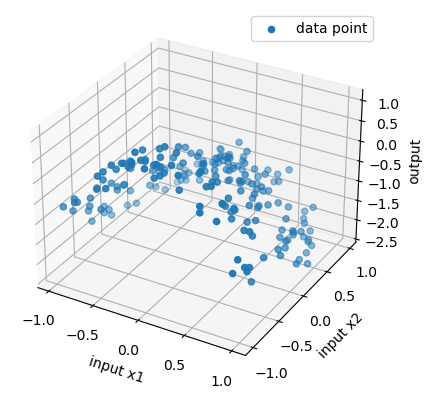

In [164]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], label="data point")
ax.set_xlabel('input x1')
ax.set_ylabel('input x2')
ax.set_zlabel('output')
ax.legend(loc='best')
ax.title("Figure 1: Scatter plot of data")

## i.b

In [39]:
from sklearn.model_selection import train_test_split

X = data[:, :2]
Y = data[:, 2]

np.random.seed(333)
# Use the train:test to divide the dataset with a ratio of 2:8
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [59]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

def LassoRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('reg', Lasso(alpha=alpha))
    ])

def get_coef(model):
    return model.named_steps['reg'].coef_

def get_intercept(model):
    return model.named_steps['reg'].intercept_

In [60]:
c_list = [1, 10, 100, 1000]
model_list = []
mean_list = []
pred_list = []

In [61]:
for c in c_list:
    reg = LassoRegression(5, 1/(2*c))
    model = reg.fit(x_train, y_train)
    pred = reg.predict(x_test)
    mean = mean_squared_error(y_test, pred)
    
    model_list.append(model)
    pred_list.append(pred)
    mean_list.append(mean)

In [62]:
for model in model_list:
    print(get_coef(model))

[ 0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.
 -0. -0. -0.]
[ 0.         -0.         -0.80546865 -1.45330017 -0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.         -0.
 -0.         -0.         -0.        ]
[ 0.         -0.         -1.02462187 -1.99147049 -0.          0.
 -0.         -0.         -0.          0.         -0.         -0.
  0.          0.          0.01995108 -0.         -0.         -0.
 -0.         -0.          0.11427861]
[ 0.          0.00662436 -1.12929224 -2.27851731  0.         -0.03659612
  0.         -0.          0.0113824   0.          0.22273474 -0.
  0.11719395  0.01927037  0.07369879  0.         -0.         -0.02745631
 -0.04993251 -0.          0.36570462]


In [64]:
for model in model_list:
    print(get_intercept(model))

-0.6937472416091168
-0.19899433520070592
-0.02364272769882969
0.014012207474357385


## i.c

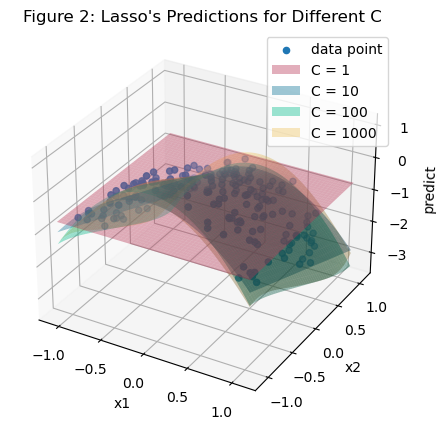

In [194]:
fig = plt.figure(figsize=(5,5))

x1 = np.linspace(X[:, 0].min()-0.1, X[:, 0].max()+0.1)
x2 = np.linspace(X[:, 1].min()-0.1, X[:, 1].max()+0.1)
X1, X2 = np.meshgrid(x1, x2)

colors = ['#ef476f', '#118ab2', '#06d6a0', '#ffd166']
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('predict')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], label="data point")

for i in range(1, len(model_list) + 1):
    Z = []
    for j in range(len(X1)):
        temp = np.column_stack((X1[j], X2[j]))
        Z.append(model_list[i - 1].predict(temp))
    Z = np.array(Z)
    
    surf = ax.plot_surface(X1, X2, Z, label="C = {}".format(c_list[i - 1]), color=colors[i-1], alpha=0.4)
    surf._facecolors2d = surf._facecolor3d
    surf._edgecolors2d = surf._edgecolor3d
plt.legend()
plt.title("Figure 2: Lasso's Predictions for Different C")
plt.show()

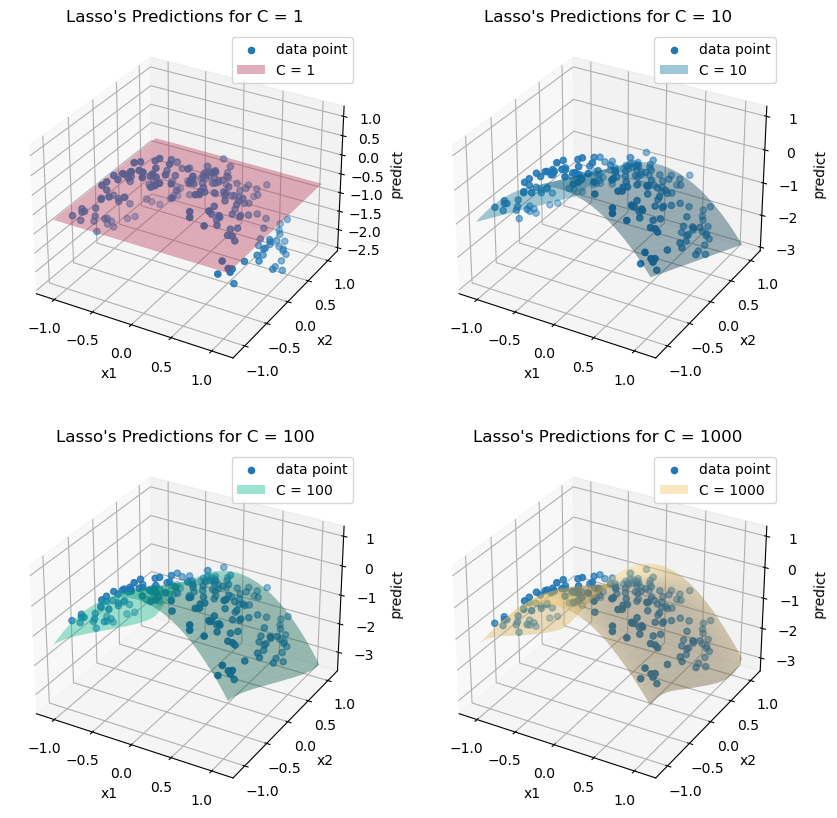

In [192]:
fig = plt.figure(figsize=(10,10))

x1 = np.linspace(X[:, 0].min()-0.1, X[:, 0].max()+0.1)
x2 = np.linspace(X[:, 1].min()-0.1, X[:, 1].max()+0.1)
X1, X2 = np.meshgrid(x1, x2)
colors = ['#ef476f', '#118ab2', '#06d6a0', '#ffd166']

for i in range(1, len(model_list) + 1):
    ax = fig.add_subplot(2,2,i, projection='3d')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('predict')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], label="data point")

    Z = []
    for j in range(len(X1)):
        temp = np.column_stack((X1[j], X2[j]))
        Z.append(model_list[i - 1].predict(temp))
    Z = np.array(Z)
    
    surf = ax.plot_surface(X1, X2, Z, label="C = {}".format(c_list[i - 1]), color=colors[i-1], alpha=0.4)
    surf._facecolors2d = surf._facecolor3d
    surf._edgecolors2d = surf._edgecolor3d

    plt.legend()
    plt.title("Lasso's Predictions for C = {}".format(c_list[i-1]))
plt.show()

## i.e

In [195]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('reg', Ridge(alpha=alpha))
    ])

c_list = [1, 10, 100, 1000]
ridge_model_list = []
ridge_mean_list = []
ridge_pred_list = []

for c in c_list:
    reg = RidgeRegression(5, 1/(2*c))
    model = reg.fit(x_train, y_train)
    pred = reg.predict(x_test)
    mean = mean_squared_error(y_test, y_pred1)
    
    ridge_model_list.append(model)
    ridge_pred_list.append(pred)
    ridge_mean_list.append(mean)

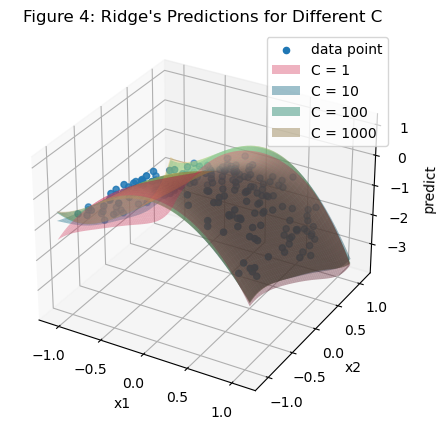

In [200]:
fig = plt.figure(figsize=(5,5))

x1 = np.linspace(X[:, 0].min()-0.1, X[:, 0].max()+0.1)
x2 = np.linspace(X[:, 1].min()-0.1, X[:, 1].max()+0.1)
X1, X2 = np.meshgrid(x1, x2)

colors = ['#ef476f', '#118ab2', '#06d6a0', '#ffd166']
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('predict')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], label="data point")

for i in range(1, len(ridge_model_list) + 1):
    Z = []
    for j in range(len(X1)):
        temp = np.column_stack((X1[j], X2[j]))
        Z.append(ridge_model_list[i - 1].predict(temp))
    Z = np.array(Z)
    
    surf = ax.plot_surface(X1, X2, Z, label="C = {}".format(c_list[i - 1]), color=colors[i-1], alpha=0.4)
    surf._facecolors2d = surf._facecolor3d
    surf._edgecolors2d = surf._edgecolor3d
plt.legend()
plt.title("Figure 4: Ridge's Predictions for Different C")
plt.show()

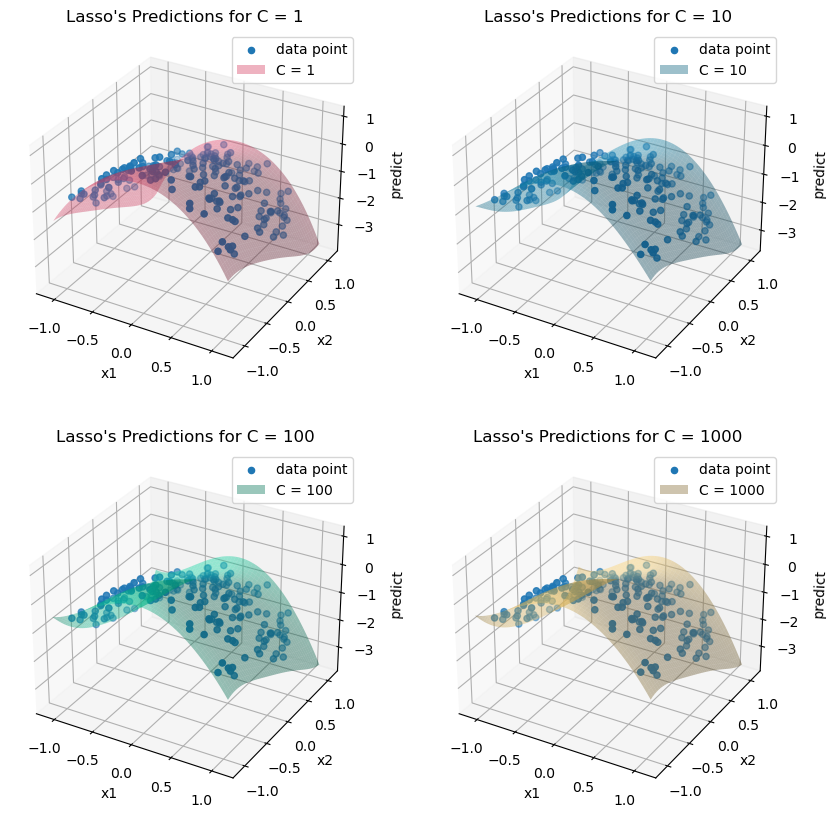

In [201]:
fig = plt.figure(figsize=(10,10))

x1 = np.linspace(X[:, 0].min()-0.1, X[:, 0].max()+0.1)
x2 = np.linspace(X[:, 1].min()-0.1, X[:, 1].max()+0.1)
X1, X2 = np.meshgrid(x1, x2)
colors = ['#ef476f', '#118ab2', '#06d6a0', '#ffd166']

for i in range(1, len(ridge_model_list) + 1):
    ax = fig.add_subplot(2,2,i, projection='3d')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('predict')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], label="data point")

    Z = []
    for j in range(len(X1)):
        temp = np.column_stack((X1[j], X2[j]))
        Z.append(ridge_model_list[i - 1].predict(temp))
    Z = np.array(Z)
    
    surf = ax.plot_surface(X1, X2, Z, label="C = {}".format(c_list[i - 1]), color=colors[i-1], alpha=0.4)
    surf._facecolors2d = surf._facecolor3d
    surf._edgecolors2d = surf._edgecolor3d

    plt.legend()
    plt.title("Lasso's Predictions for C = {}".format(c_list[i-1]))
plt.show()

In [197]:
for model in ridge_model_list:
    print(get_coef(model))

[ 0.         -0.03259273 -1.05109863 -1.68043539 -0.01295879 -0.02562663
  0.00769356 -0.03576147  0.12402509 -0.03064388 -0.34929724 -0.00204372
 -0.10964166  0.04224613  0.12817339  0.0556989  -0.10799262 -0.14119563
 -0.04370578 -0.02217557  0.28840159]
[ 0.         -0.08187995 -1.17828699 -2.34883808  0.06765244 -0.19543941
  0.12069231  0.12905674  0.42236899  0.10115175  0.28212079 -0.12662782
  0.17800472  0.01113927  0.22562378 -0.01226828 -0.03149365 -0.43483924
 -0.23312365 -0.21580231  0.34462654]
[ 0.         -0.13841748 -1.21647967 -2.52398299  0.12929431 -0.24501431
  0.29935867  0.12854273  0.5986356   0.18916414  0.45808272 -0.23308213
  0.27558309 -0.01845663  0.25342136 -0.1509873   0.08239858 -0.63321558
 -0.3202699  -0.31446841  0.3122912 ]
[ 0.         -0.14937476 -1.2214744  -2.54611466  0.13997993 -0.25163704
  0.33607562  0.12359779  0.62681416  0.20317075  0.48064773 -0.25115449
  0.28943982 -0.02422154  0.25716597 -0.17983756  0.10403228 -0.66729794
 -0.332165

In [198]:
for model in ridge_model_list:
    print(get_intercept(model))

-0.05854166108762471
0.04653482493919703
0.07309482429721892
0.07643571024878015


## ii.a

In [136]:
X.shape

(199, 2)

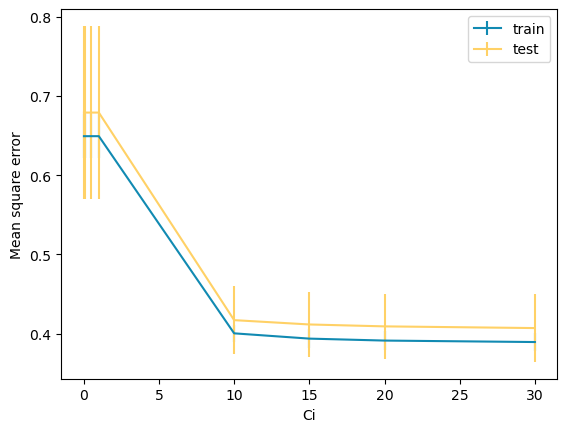

In [206]:
train_mean_error=[]
train_std_error=[]
test_mean_error=[]
test_std_error=[]

Ci_range = [0.01, 0.1, 0.5, 1, 10,15, 20, 30]
# Ci_range = [1, 10, 100, 1000]

for Ci in Ci_range:
    model = Lasso(alpha=1/(2*Ci))

    train_temp=[]
    test_temp=[]
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=5)
    for train, test in kf.split(X):
        model.fit(X[train], y[train])
        train_pred = model.predict(X[train])
        test_pred = model.predict(X[test])
        
        from sklearn.metrics import mean_squared_error
        train_temp.append(mean_squared_error(y[train],train_pred))
        test_temp.append(mean_squared_error(y[test],test_pred))
        
    train_mean_error.append(np.array(train_temp).mean())
    train_std_error.append(np.array(train_temp).std())
    test_mean_error.append(np.array(test_temp).mean())
    test_std_error.append(np.array(test_temp).std())


import matplotlib.pyplot as plt
plt.errorbar(Ci_range,train_mean_error,yerr=train_std_error, c='#118ab2', label='train')
plt.errorbar(Ci_range,test_mean_error,yerr=test_std_error, c='#ffd166', label='test')
plt.xlabel('Ci'); plt.ylabel('Mean square error')
plt.legend()
plt.show()

[0.6492007415245389, 0.6492007415245389, 0.6492007415245389, 0.6492007415245389, 0.40029859244943305, 0.3936453567776036, 0.3911730321366785, 0.3893222188067071]


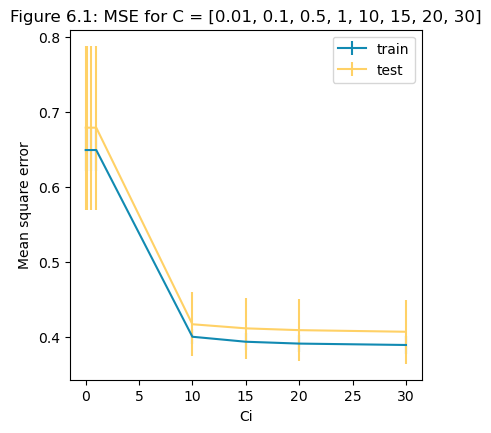

In [267]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))

def draw_mean(Ci_list):
    for i, c_range in enumerate(Ci_range):
        ax = fig.add_subplot(2,2,i+1)
        train_mean_error=[]
        train_std_error=[]
        test_mean_error=[]
        test_std_error=[]

        for c in c_range:
            model = Lasso(alpha=1/(2*c))

            train_temp=[]
            test_temp=[]
            from sklearn.model_selection import KFold
            kf = KFold(n_splits=5)
            for train, test in kf.split(X):
                model.fit(X[train], y[train])
                train_pred = model.predict(X[train])
                test_pred = model.predict(X[test])

                from sklearn.metrics import mean_squared_error
                train_temp.append(mean_squared_error(y[train],train_pred))
                test_temp.append(mean_squared_error(y[test],test_pred))

            train_mean_error.append(np.array(train_temp).mean())
            train_std_error.append(np.array(train_temp).std())
            test_mean_error.append(np.array(test_temp).mean())
            test_std_error.append(np.array(test_temp).std())

        ax.errorbar(c_range,train_mean_error,yerr=train_std_error, c='#118ab2', label='train')
        ax.errorbar(c_range,test_mean_error,yerr=test_std_error, c='#ffd166', label='test')
        print(train_mean_error)
        plt.xlabel('Ci')
        plt.ylabel('Mean square error')
        plt.legend()
        plt.title("Figure 6.{}: MSE for C = {}".format(i+1, c_range))
    plt.show()

# Ci_range = [
#     [1, 10, 100, 1000],
#     [0.1, 1, 10, 100],
#     [1, 5, 10, 15, 50],
#     [1, 5, 10, 15, 20, 30]
# ]
Ci_range = [[0.01, 0.1, 0.5, 1, 10,15, 20, 30]]
draw_mean(Ci_range)

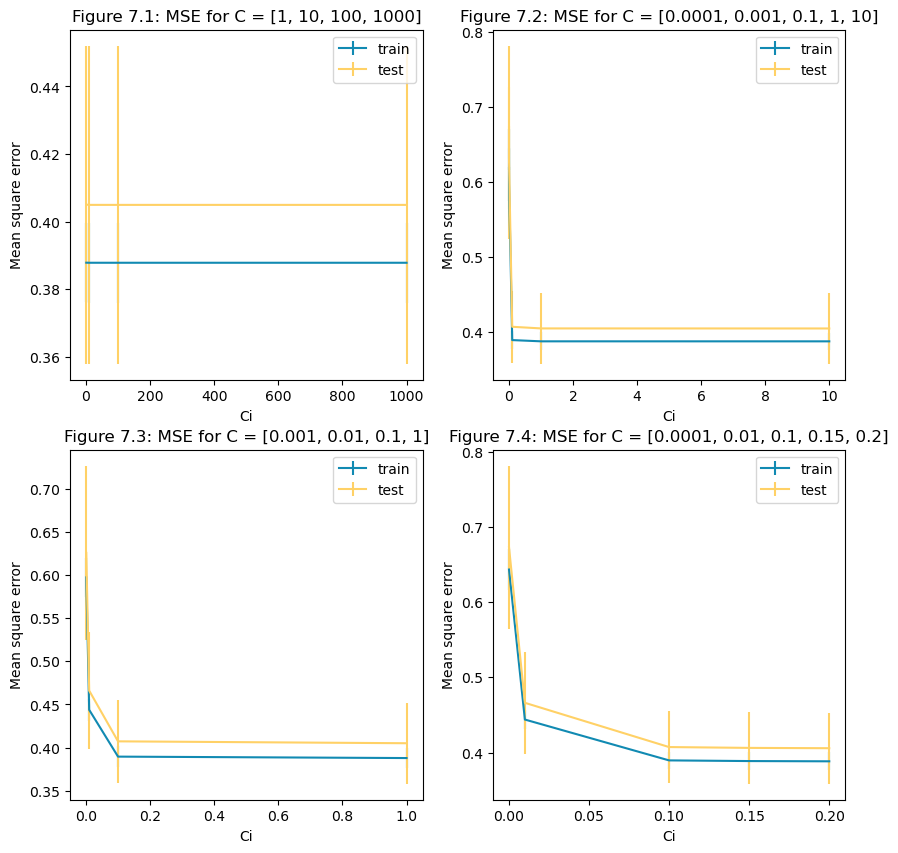

In [265]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))

def draw_mean(Ci_list):
    for i, c_range in enumerate(Ci_range):
        ax = fig.add_subplot(2,2,i+1)
        train_mean_error=[]
        train_std_error=[]
        test_mean_error=[]
        test_std_error=[]

        for c in c_range:
            model = Ridge(alpha=1/(2*c))

            train_temp=[]
            test_temp=[]
            from sklearn.model_selection import KFold
            kf = KFold(n_splits=5)
            for train, test in kf.split(X):
                model.fit(X[train], y[train])
                train_pred = model.predict(X[train])
                test_pred = model.predict(X[test])

                from sklearn.metrics import mean_squared_error
                train_temp.append(mean_squared_error(y[train],train_pred))
                test_temp.append(mean_squared_error(y[test],test_pred))

            train_mean_error.append(np.array(train_temp).mean())
            train_std_error.append(np.array(train_temp).std())
            test_mean_error.append(np.array(test_temp).mean())
            test_std_error.append(np.array(test_temp).std())

        ax.errorbar(c_range,train_mean_error,yerr=train_std_error, c='#118ab2', label='train')
        ax.errorbar(c_range,test_mean_error,yerr=test_std_error, c='#ffd166', label='test')
        plt.xlabel('Ci')
        plt.ylabel('Mean square error')
        plt.legend()
        plt.title("Figure 7.{}: MSE for C = {}".format(i+1, c_range))
    plt.show()

Ci_range = [
    [1, 10, 100, 1000],
    [0.0001, 0.001, 0.1, 1, 10],
    [0.001, 0.01, 0.1, 1],
    [0.0001, 0.01, 0.1, 0.15, 0.2],
]
draw_mean(Ci_range)

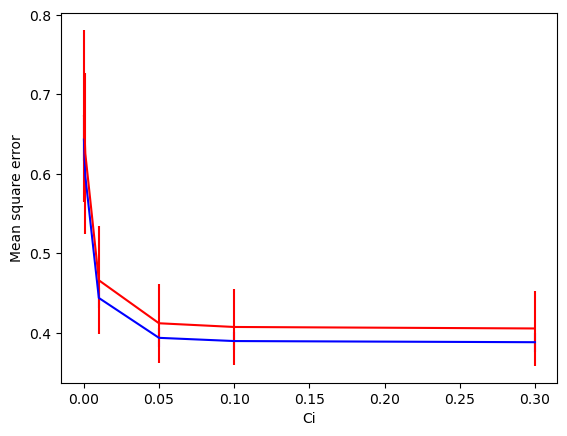

In [162]:
train_mean_error=[]
train_std_error=[]
test_mean_error=[]
test_std_error=[]

Ci_range = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3]

for Ci in Ci_range:
    model = Ridge(alpha=1/(2*Ci))

    train_temp=[]
    test_temp=[]
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=5)
    for train, test in kf.split(X):
        model.fit(X[train], y[train])
        train_pred = model.predict(X[train])
        test_pred = model.predict(X[test])
        
        from sklearn.metrics import mean_squared_error
        train_temp.append(mean_squared_error(y[train],train_pred))
        test_temp.append(mean_squared_error(y[test],test_pred))
        
    train_mean_error.append(np.array(train_temp).mean())
    train_std_error.append(np.array(train_temp).std())
    test_mean_error.append(np.array(test_temp).mean())
    test_std_error.append(np.array(test_temp).std())


import matplotlib.pyplot as plt
plt.errorbar(Ci_range,train_mean_error,yerr=train_std_error, c='blue', label='train')
plt.errorbar(Ci_range,test_mean_error,yerr=test_std_error, c='red', label='test')
plt.xlabel('Ci'); plt.ylabel('Mean square error')
# plt.xlim((X.min()-1,X.max()+1))
plt.show()